📌 Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

📌 Step 2: Load Dataset

In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


📌 Step 3: Data Preprocessing

In [3]:
# Drop non-numeric and ID columns
df_numeric = df.drop(['CustomerID', 'Gender'], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

📌 Step 4: Elbow Method to Determine k

✅ Choose k = 5 based on the elbow plot (common for this dataset).

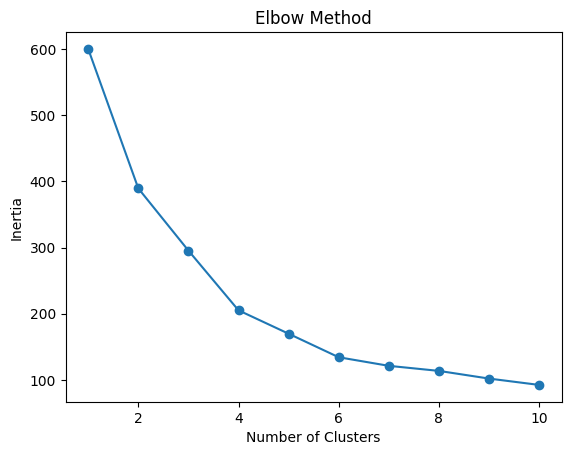

In [4]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

📌 Step 5: Clustering with K-Means

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster label to original DataFrame
df['Cluster'] = clusters

📌 Step 6: Visualization of Clusters

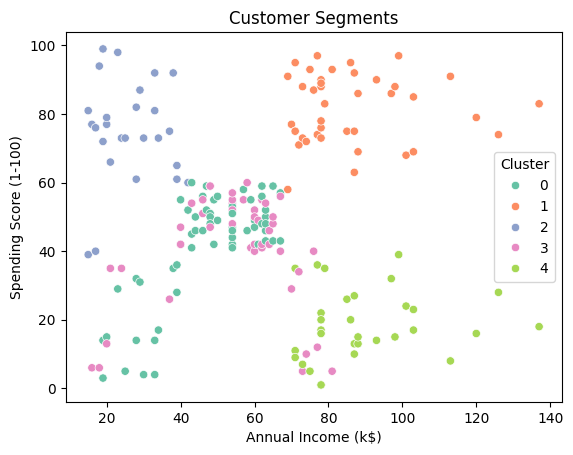

In [6]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments")
plt.savefig("../outputs/cluster_plot.png")
plt.show()

📌 Step 7: Evaluate with Silhouette Score

In [7]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 2))

# Save to file
with open("../outputs/silhouette_score.txt", "w") as f:
    f.write(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.41


📌 Step 8: requirements.txt

pandas  
matplotlib  
seaborn  
scikit-learn  